In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


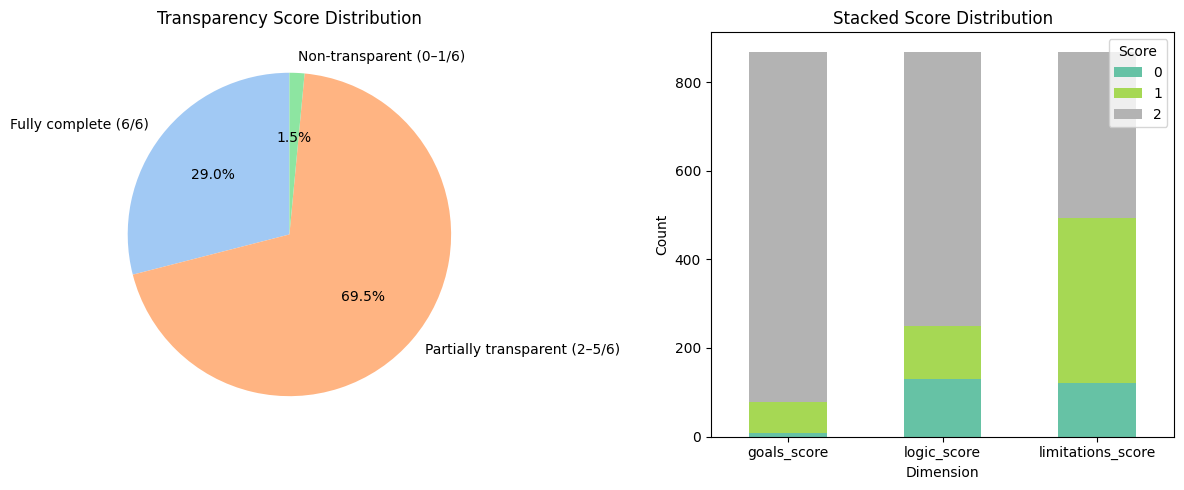

📊 Score Summary:
                        Mean  Median  Mode
goals_score        1.903337     2.0     2
logic_score        1.562716     2.0     2
limitations_score  1.293441     1.0     2

✅ Score Breakdown (counts):
 {'Fully complete (6/6)': np.int64(252), 'Partially transparent (2–5/6)': np.int64(604), 'Non-transparent (0–1/6)': np.int64(13)}
📈 Score Breakdown (percentages):
 {'Fully complete (6/6)': '29.0%', 'Partially transparent (2–5/6)': '69.5%', 'Non-transparent (0–1/6)': '1.5%'}


In [7]:
# STEP 1: Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# STEP 2: Load your data (adjust path if needed)
file_path = '/content/drive/MyDrive/gpt4_full_transparency_scoring.csv'
df = pd.read_csv(file_path)

# STEP 3: Compute total transparency score (0–6)
df['total_score'] = df[['goals_score', 'logic_score', 'limitations_score']].sum(axis=1)

# STEP 4: Summary stats: mean, median, mode for each dimension
summary = {
    'Mean': df[['goals_score', 'logic_score', 'limitations_score']].mean(),
    'Median': df[['goals_score', 'logic_score', 'limitations_score']].median(),
    'Mode': df[['goals_score', 'logic_score', 'limitations_score']].mode().iloc[0]
}
summary_df = pd.DataFrame(summary)

# STEP 5: Count score categories
score_counts = {
    'Fully complete (6/6)': (df['total_score'] == 6).sum(),
    'Partially transparent (2–5/6)': df['total_score'].between(2, 5).sum(),
    'Non-transparent (0–1/6)': df['total_score'].between(0, 1).sum()
}
score_percentages = {k: f"{v/len(df)*100:.1f}%" for k, v in score_counts.items()}

# STEP 6: Visualizations
plt.figure(figsize=(18, 5))

# Pie chart
plt.subplot(1, 3, 2)
plt.pie(score_counts.values(), labels=score_counts.keys(), autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
plt.title('Transparency Score Distribution')

# Stacked bar
plt.subplot(1, 3, 3)
score_distribution = df[['goals_score', 'logic_score', 'limitations_score']].apply(pd.Series.value_counts).fillna(0)
score_distribution.T.plot(kind='bar', stacked=True, ax=plt.gca(), colormap='Set2')
plt.title('Stacked Score Distribution')
plt.xlabel('Dimension')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Score')

plt.tight_layout()
plt.show()

# STEP 7: Print summary tables
print("📊 Score Summary:\n", summary_df)
print("\n✅ Score Breakdown (counts):\n", score_counts)
print("📈 Score Breakdown (percentages):\n", score_percentages)